## House Prices: Advanced Regression Techniques

In [1]:
# Import dependencies
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the data
def load_data(filepath):
    return pd.read_csv(filepath)

train_df_orig = load_data('./data/train.csv')
test_df_orig = load_data('./data/test.csv')

### Exploratory Data Analysis

In [3]:
train_df_orig.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Inspecting values of categorical attributes
train_df_orig["MiscFeature"].value_counts()
train_df_orig["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [6]:
# Get summary of numerical attributes
train_df_orig.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


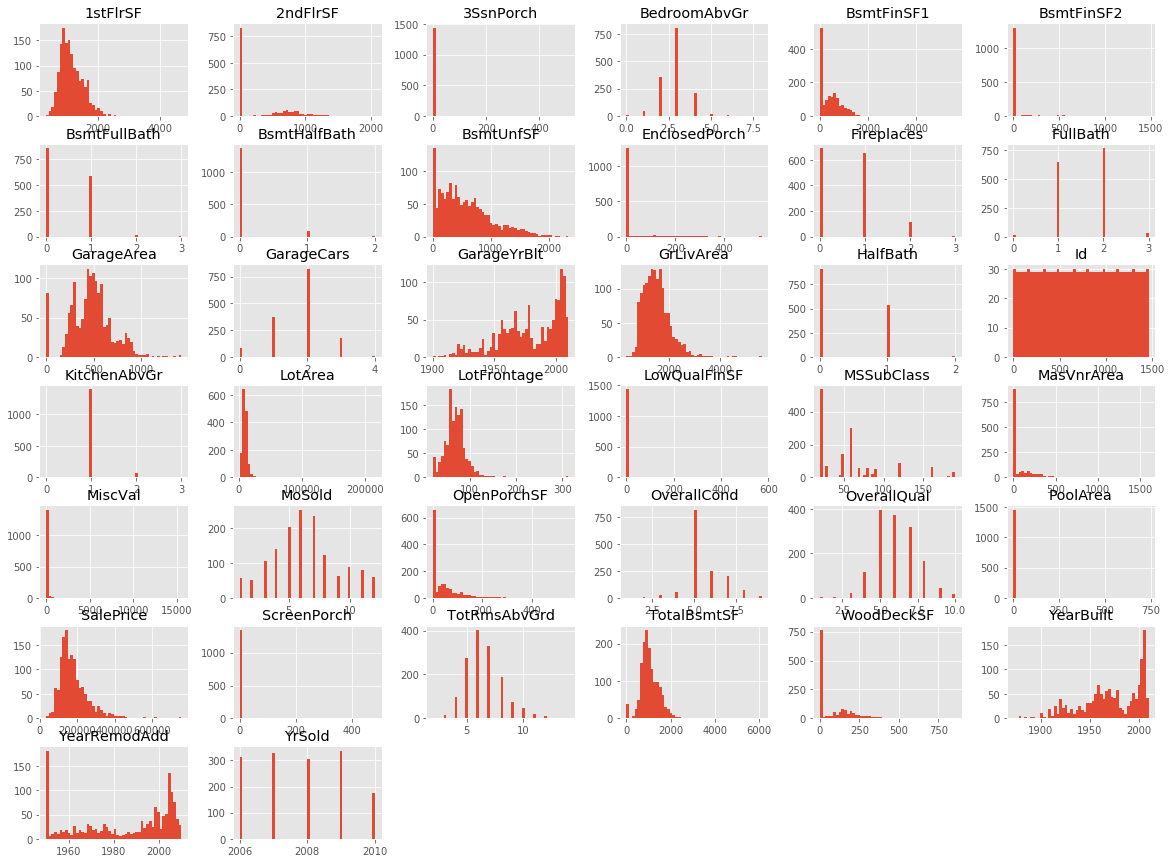

In [7]:
# Plot histograms for numerical attributes
train_df_orig.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Create copy of original dataset
train_df = train_df_orig.copy()
test_df = test_df_orig.copy()

In [9]:
# Look for correlations
corr_matrix = train_df.corr()

In [10]:
# Look at how each attribute correlates with the sale price
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

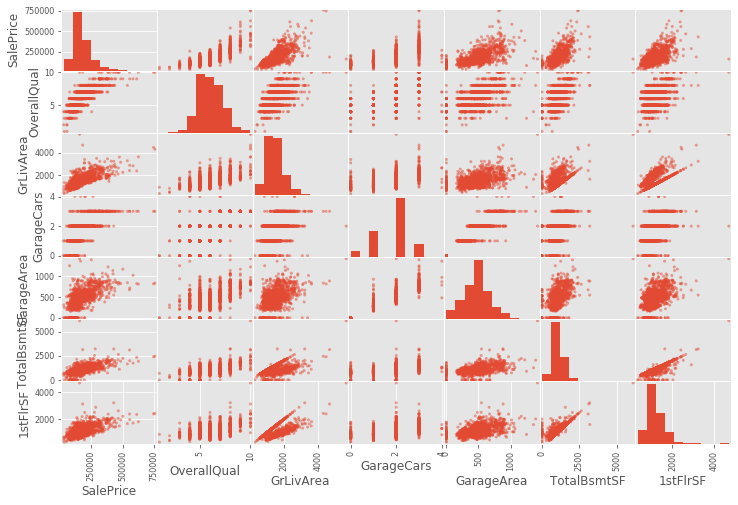

In [11]:
# Scatter plots for promising attributes
attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

scatter_matrix(train_df[attributes], figsize=(12, 8))
plt.show()

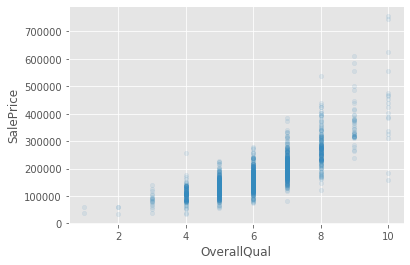

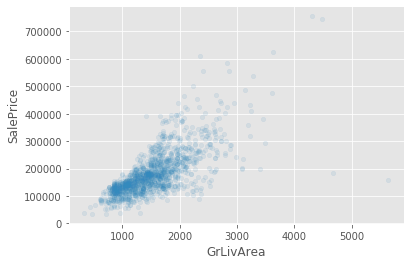

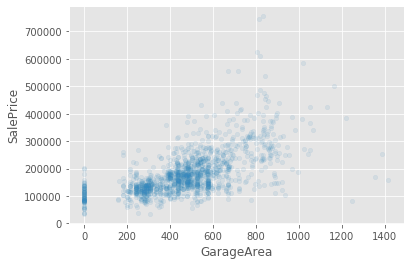

In [12]:
# View most promising attributes in more detail
train_df.plot(kind='scatter', x='OverallQual', y='SalePrice', alpha=0.1)
train_df.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.1)
train_df.plot(kind='scatter', x='GarageArea', y='SalePrice', alpha=0.1)

### Scikit-Learn Preprocessing Pipeline

In [13]:
# Keep labels separate from rest of training data 
train_df_data = train_df.drop('SalePrice', axis=1)
train_df_labels = train_df['SalePrice'].copy()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Get numerical and categorical attributes
num_attribs = [i for i in train_df_data.columns if train_df_data.dtypes[i] in ['int64', 'float64']]
cat_attribs = [i for i in train_df_data.columns if train_df_data.dtypes[i] == 'object']

# Create pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Create pipeline for categorical attributes
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat', OneHotEncoder())
])

# Create full pipeline for both numerical and categorical attributes
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

# Apply pipeline to full dataset
train_df_prepared = full_pipeline.fit_transform(train_df_data)

### Model Selection and Training

In [15]:
from sklearn.linear_model import LinearRegression

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(train_df_prepared, train_df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Predictions

In [16]:
# Try on some instances of training set
some_data = train_df_data.iloc[:5]
some_labels = train_df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [207568.10779033 205931.72951391 205643.87730275 164546.09685148
 290592.37221611]
Labels: [208500, 181500, 223500, 140000, 250000]


In [17]:
from sklearn.metrics import mean_squared_error

# Measure RMSE on training set
train_df_predictions = lin_reg.predict(train_df_prepared)
lin_mse = mean_squared_error(train_df_labels, train_df_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"Prediction error: ${lin_rmse}")

Prediction error: $20679.588432745244


### Further Model Development

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Fit decision tree to data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_df_prepared, train_df_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
# Evaluate on training set
train_df_predictions = tree_reg.predict(train_df_prepared)
tree_mse = mean_squared_error(train_df_labels, train_df_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"Prediction error: ${tree_rmse}")

Prediction error: $0.0


### Cross-Validation

In [20]:
def display_scores(scores):
    mean_score = scores.mean()
    std_score = scores.std()
    print("Scores:", scores)
    print("Mean:", mean_score)
    print("Standard deviation:", std_score)
    print("Score:", round(mean_score, 2), '±', round(std_score, 2), '(2.d.p)')

In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation for decision tree
scores = cross_val_score(tree_reg, train_df_prepared, train_df_labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = np.sqrt(-scores)
display_scores(tree_mse_scores)

Scores: [36721.57172702 40460.43761749 37308.18937295 45284.86877534
 40538.75224484 29452.23329184 32992.68883435 35718.39321704
 70530.4560455  33829.86308692]
Mean: 40283.745421328116
Standard deviation: 10929.27354092512
Score: 40283.75 ± 10929.27 (2.d.p)


In [22]:
# Cross-validation for linear regression
lin_scores = cross_val_score(lin_reg, train_df_prepared, train_df_labels, scoring="neg_mean_squared_error", cv=10)
lin_mse_scores = np.sqrt(-lin_scores)
display_scores(lin_mse_scores)

Scores: [24142.44270916 35295.45492229 23330.86654512 41623.56601871
 30567.55184932 43519.64241652 24218.18254598 22649.91588409
 66781.59679806 22235.9333501 ]
Mean: 33436.51530393561
Standard deviation: 13444.56642533285
Score: 33436.52 ± 13444.57 (2.d.p)


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Cross-validation for random forest
forest_reg = RandomForestRegressor()
forest_reg.fit(train_df_prepared, train_df_labels)

forest_scores = cross_val_score(forest_reg, train_df_prepared, train_df_labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = np.sqrt(-forest_scores)
display_scores(forest_mse_scores)

Scores: [25045.65360932 26648.43315988 21911.43879132 39158.14245128
 34144.34076244 25573.17697586 23288.23480831 24057.61490439
 39416.37983487 27468.61736986]
Mean: 28671.20326675364
Standard deviation: 6161.380516688299
Score: 28671.2 ± 6161.38 (2.d.p)


### Model Tuning - Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

# Specify parameter grid
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

# Run grid search on chosen model (random forest)
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=2)
grid_search.fit(train_df_prepared, train_df_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .

[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .. bootstrap=False, max_features=3, n_estimators=3, total=   0.0s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .. bootstrap=False, max_features=3, n_estimators=3, total=   0.0s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .. bootstrap=False, max_features=3, n_estimators=3, total=   0.0s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [25]:
# Display best parameters and model obtained 
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [26]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

47532.819394922175 {'max_features': 2, 'n_estimators': 3}
41180.83617364409 {'max_features': 2, 'n_estimators': 10}
36953.07008487856 {'max_features': 2, 'n_estimators': 30}
46010.09359260701 {'max_features': 4, 'n_estimators': 3}
38185.35412913641 {'max_features': 4, 'n_estimators': 10}
35967.076196161746 {'max_features': 4, 'n_estimators': 30}
43282.223296223536 {'max_features': 6, 'n_estimators': 3}
35763.48354862389 {'max_features': 6, 'n_estimators': 10}
35260.82878664145 {'max_features': 6, 'n_estimators': 30}
42848.408469065536 {'max_features': 8, 'n_estimators': 3}
37168.75983360837 {'max_features': 8, 'n_estimators': 10}
33802.37199799612 {'max_features': 8, 'n_estimators': 30}
45233.39756074186 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
39031.464668363384 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
45168.984027713246 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
37335.28796588579 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [28]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017755,0.001804,0.001381,0.000152,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.688369e+09,-2.124962e+09,...,-2.259369e+09,3.877360e+08,18,-7.356245e+08,-6.537089e+08,-5.930364e+08,-8.746186e+08,-5.111764e+08,-6.736330e+08,1.245175e+08
1,0.049822,0.002600,0.002354,0.000214,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.221676e+09,-1.398050e+09,...,-1.695861e+09,5.394217e+08,11,-3.270750e+08,-2.665869e+08,-2.774364e+08,-3.636709e+08,-3.216536e+08,-3.112846e+08,3.534051e+07
2,0.125283,0.000920,0.004716,0.000132,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9.226370e+08,-1.323365e+09,...,-1.365529e+09,3.875874e+08,6,-2.294463e+08,-2.174481e+08,-1.930201e+08,-2.688532e+08,-2.009426e+08,-2.219420e+08,2.666319e+07
3,0.016813,0.000309,0.001069,0.000030,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.781540e+09,-1.995774e+09,...,-2.116929e+09,6.652718e+08,17,-4.477930e+08,-4.975217e+08,-7.066951e+08,-3.832429e+08,-5.708850e+08,-5.212275e+08,1.112281e+08
4,0.049252,0.000507,0.002214,0.000153,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.156762e+09,-1.358708e+09,...,-1.458121e+09,3.745169e+08,9,-2.827444e+08,-3.634205e+08,-2.171154e+08,-3.216184e+08,-2.505167e+08,-2.870831e+08,5.151989e+07
5,0.142748,0.003063,0.004549,0.000032,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.162066e+08,-1.314276e+09,...,-1.293631e+09,3.924638e+08,4,-2.344101e+08,-1.939567e+08,-1.674139e+08,-2.516280e+08,-1.965647e+08,-2.087947e+08,3.024219e+07
6,0.019776,0.001925,0.001121,0.000081,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.755986e+09,-1.845191e+09,...,-1.873351e+09,3.890440e+08,14,-5.740378e+08,-4.914800e+08,-4.742163e+08,-5.711670e+08,-5.721617e+08,-5.366126e+08,4.424623e+07
7,0.055791,0.000774,0.002135,0.000091,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-9.605275e+08,-1.248371e+09,...,-1.279027e+09,4.037893e+08,3,-2.613937e+08,-3.115889e+08,-2.560700e+08,-2.527891e+08,-2.153330e+08,-2.594349e+08,3.073871e+07
8,0.164931,0.005571,0.005049,0.000721,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-7.445709e+08,-1.210354e+09,...,-1.243326e+09,4.215518e+08,2,-1.690581e+08,-1.727104e+08,-1.818812e+08,-2.139713e+08,-1.943835e+08,-1.864009e+08,1.632469e+07
9,0.021451,0.000763,0.001073,0.000040,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.450216e+09,-2.174394e+09,...,-1.835986e+09,3.484639e+08,12,-4.724091e+08,-4.960298e+08,-4.925096e+08,-5.353959e+08,-4.971766e+08,-4.987042e+08,2.042338e+07


### Model Tuning - Randomized Search

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Specify parameter distributions
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

# Create model and run randomized search
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=500, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2, n_jobs=-1)
rnd_search.fit(train_df_prepared, train_df_labels)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [30]:
# Display best parameters and model obtained 
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 139}

In [31]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=139, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [32]:
import joblib

def save_model(model, filepath):
        joblib.dump(model, filepath)
        
def load_model(filepath):
    return joblib.load(filepath)

In [33]:
# Save best model to disk
save_model(rnd_search, filepath='models/best_random_forest_random_search.pkl')

In [34]:
loaded_model = load_model('models/best_random_forest_random_search.pkl')

### Analyzing Best Models and their Errors

In [35]:
# Inspect relative importance of each attribute for making accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.35044174e-03, 5.40568789e-03, 1.63339317e-02, 2.43082708e-02,
       4.93940180e-02, 4.26549402e-03, 2.51547559e-02, 1.71513569e-02,
       1.84245734e-02, 2.64796004e-02, 1.40005934e-03, 1.13637890e-02,
       3.77121121e-02, 2.21340801e-02, 2.65798516e-02, 5.83014065e-04,
       5.06527263e-02, 4.07137277e-03, 5.96350846e-04, 2.43570375e-02,
       4.59404112e-03, 6.47815764e-03, 6.22428912e-04, 1.44314673e-02,
       9.48512841e-03, 1.08720737e-02, 4.78607705e-02, 5.40561136e-02,
       1.26580392e-02, 1.09069410e-02, 2.62172032e-03, 5.80627645e-04,
       3.49283509e-03, 1.77916421e-03, 4.37085714e-04, 5.40561919e-03,
       4.40449348e-03, 2.72590897e-04, 5.26154661e-04, 1.31099883e-04,
       2.68365287e-03, 2.87738204e-03, 1.28561583e-04, 2.22522112e-04,
       7.11408315e-04, 2.93656616e-04, 1.35117989e-03, 7.54808686e-04,
       1.86796884e-04, 1.76352382e-03, 1.75804914e-03, 2.31923211e-03,
       3.44731599e-04, 1.98591206e-03, 4.02137558e-06, 0.00000000e+00,
      

In [36]:
# Display importance scores next to attribute names
sorted(zip(feature_importances, train_df_data.columns), reverse=True)

[(0.054056113641316364, 'ExterQual'),
 (0.05065272633714691, 'HouseStyle'),
 (0.04939401795953578, 'LotArea'),
 (0.047860770475503675, 'MasVnrArea'),
 (0.037712112085788195, 'Neighborhood'),
 (0.0265798516465002, 'Condition2'),
 (0.026479600396522557, 'Utilities'),
 (0.02515475587334528, 'Alley'),
 (0.02435703752627696, 'YearBuilt'),
 (0.024308270835920708, 'LotFrontage'),
 (0.02213408007807119, 'Condition1'),
 (0.018424573434478772, 'LandContour'),
 (0.01715135692993124, 'LotShape'),
 (0.016333931656633167, 'MSZoning'),
 (0.014431467292682252, 'Exterior1st'),
 (0.012658039189098996, 'ExterCond'),
 (0.011363788999203794, 'LandSlope'),
 (0.011024789586451875, 'SaleCondition'),
 (0.01090694104960241, 'Foundation'),
 (0.010872073727694182, 'MasVnrType'),
 (0.009485128406145411, 'Exterior2nd'),
 (0.0064781576423653155, 'RoofStyle'),
 (0.006350441737906823, 'Id'),
 (0.00540568789226705, 'MSSubClass'),
 (0.00540561918680862, 'BsmtFinType2'),
 (0.004594041120677606, 'YearRemodAdd'),
 (0.00440

### Predict Outputs for Test Set

In [37]:
final_model = rnd_search.best_estimator_

# Run full pipeline on test data
X_test_prepared = full_pipeline.transform(test_df)

# Obtain predictions
final_predictions = final_model.predict(X_test_prepared)

In [38]:
# Combine Id column of original DataFrame with predictions
df_result_combined = pd.concat([test_df['Id'], pd.Series(final_predictions, name='SalePrice')], axis=1)

In [39]:
# Create submission file
df_result_combined.to_csv('submissions/submission.csv', index=False)

## Others

### Preprocessing without Pipelines

In [40]:
# # Impute missing values for training data
# imputer = SimpleImputer(strategy='median')

# # Select numerical columns and fit imputer to these columns
# train_df_data_num = train_df_data.select_dtypes(include=[np.number])
# imputer.fit(train_df_data_num)

# # Transform original training set
# X_num = imputer.transform(train_df_data_num)

# # Create DataFrame for transformed numerical columns
# train_df_data_num_tr = pd.DataFrame(X_num, columns=train_df_data_num.columns, index=train_df_data_num.index)

In [41]:
# # Select categorical columns
# cat_attribs = [i for i in train_df_data.columns if train_df_data.dtypes[i] == 'object']
# train_df_cat = train_df_data[cat_attribs]

# # Impute missing values for categorical columns using the mode
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit(train_df_cat)

# # Transform original training set
# X_cat = imputer.transform(train_df_cat)

# # Create DataFrame for transformed categorical columns
# train_df_data_cat_tr = pd.DataFrame(X_cat, columns=train_df_cat.columns, index=train_df_cat.index)

In [42]:
# def one_hot(df, cols):
#     for each in cols:
#         dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
#         df = pd.concat([df, dummies], axis=1)
#     return df

In [43]:
# # Convert categorical attributes to numerical using one-hot encoding
# train_df_cat_1hot = one_hot(train_df_data_cat_tr, cat_attribs)

In [44]:
# # Join both DataFrame objects into one
# train_df_data = pd.concat([train_df_data_num_tr, train_df_cat_1hot], axis=1)